Considere la ecuaión de calor,

$$\mathcal{U}_t=c^2\mathcal{U}_{xx},\hspace{0.5cm} 0<x<5,\hspace{0.5cm} t>0$$
$$\mathcal{U}(0,t)=40,\hspace{0.5cm}∀t>0$$
$$\mathcal{U}(5,t)=200,\hspace{0.5cm}∀t>0$$
$$\mathcal{U}(x,0)=0,\hspace{0.5cm} 0\leq x\leq 5$$

Utilice el método de Crank-Nicolson con $h=1$, $k=0.1$ y $c^2=0.835$. Compare la solución numérica con la solución obtenida en MATLAB.

# **Solución analítica**

Suponemos una solución de la forma,

$$\mathcal{U}(x,t)=\mathcal{v}(x,t)+Ψ(x)$$

Es decir, separamos el problema en dos partes, una solución estacionaria (independiente del tiempo) y una solución transitoria (que decae con el tiempo).

Rescribimos el problema original

$$\mathcal{V}_t(x,t)=c^2\mathcal{V}_{xx}(x,t)+c^2Ψ_{xx}(x)$$

## *Solución estacionaria*

$$c^2Ψ_{xx}(x)=0$$

Integramos dos veces

$$Ψ(x)=Ax+B$$

Rescribimos las condiciones de frontera

$$\mathcal{U}(0,t)=\mathcal{V}(0,t)+Ψ(0)=40⇒Ψ(0)=40$$
$$\mathcal{U}(5,t)=\mathcal{V}(5,t)+Ψ(5)=200⇒Ψ(5)=200$$

Sustituyendo

$$Ψ(0)=A(0)+B=40⇒B=40$$
$$Ψ(5)=A(5)+40=200⇒A=32$$

Así, la solución estacionaria

$$Ψ(x)=32x+40$$

## *Solución transitoria*

$$\mathcal{V}_t=c^2\mathcal{V}_{xx},\hspace{0.5cm} 0<x<5,\hspace{0.5cm} t>0$$
$$\mathcal{V}(0,t)=0,\hspace{0.5cm}∀t>0$$
$$\mathcal{V}(5,t)=0,\hspace{0.5cm}∀t>0$$

Rescribimos la condición inicial,
$$\mathcal{V}(x,0)=\mathcal{U}(x,0)-Ψ(x)⇒\mathcal{V}(x,0)=-Ψ(x)$$

Así,
$$\mathcal{V}(x,0)=-32x-40,\hspace{0.5cm} 0\leq x\leq 5$$

Resolvemos por separación de variables,
$$\frac{N'(t)}{c^2N(t)}=\frac{M''(x)}{M(x)}=λ$$

1) Solución a la ecuacion de segundo orden

$$M''(x)-λM(x)=0$$

Resolvemos por casos,

a) Para $λ=0$, se obtiene la solución $\mathcal{V}(x,t)=0$ pero esto no cumple la condición inicial.

b) Para $λ>0$, se obtiene la solución $\mathcal{V}(x,t)=0$ pero esto no cumple la condición inicial.

c) Para $λ<0⇒λ=-ω^2<0$, sustituimos

$$M''(x)+ω^2M(x)=0$$

Resolviendo la ecuación caracteristica llegamos a la solución

$$M(x)=A\cos(ωx)+B\sin(ωx)$$

Sustituyendo las condiciones de frontera

$$M(0)=A\cos(0)+B\sin(0)=0⇒A=0$$
$$M(5)=B\sin(5ω)=0⇒\sin(5ω)=0⇒5ω=nπ⇒ω=\frac{n\pi}{5},\hspace{0.5cm}n∈ℤ^+$$

Entonces la solución queda de la siguiente forma,

$$M_n(x)=A_n\sin\left(\frac{n\pi x}{5}\right)$$

2) Solución a la ecuación de primer orden

$$N'(t)=λc^2N(t)$$

Esta es una ecuación separable, entonces obtenemos una solución de la forma
$$N(t)=Be^{c^2λt}$$

Pero sabemos que $λ=-ω^2=-\frac{n^2\pi^2}{25}$, así
$$N_n(t)=B_ne^{-\frac{n^2\pi^2}{25}c^2t}$$

Luego la solución que satisface las condiciones de frontera es,
$$\mathcal{V}_n(t)=C_n\sin\left(\frac{n\pi x}{5}\right)e^{-\frac{n^2\pi^2}{25}c^2t}$$

Sabemos que, si se tiene un conjunto de soluciones para una ED homogenea, entonces cualquier combinación lineal también es solución. Entonces,

$$\mathcal{V}(x,t)=\sum_{n=1}^{∞}C_n\sin\left(\frac{n\pi x}{5}\right)e^{-\frac{n^2\pi^2}{25}c^2t}$$

Sustituyendo la condición inicial,
$$\mathcal{V}(x,0)=\sum_{n=1}^{∞}C_n\sin\left(\frac{n\pi x}{5}\right)=-32x-40$$

Esto es una serie de Fourier de senos, resolviendo
$$C_n=\frac{80}{n\pi}[5(-1)^n-1]$$

Finalmente, la solución transitoria,
$$\mathcal{V}(x,t)=\sum_{n=1}^{∞}\frac{80}{n\pi}[5(-1)^n-1]\sin\left(\frac{n\pi x}{5}\right)e^{-\frac{n^2\pi^2}{25}c^2t}$$

Asi, la solución a la ecuación de calor,

$$\mathcal{V}(x,t)=32x+40+\frac{80}{\pi}\sum_{n=1}^{∞}\frac{5(-1)^n-1}{n}\sin\left(\frac{n\pi x}{5}\right)e^{-\frac{n^2\pi^2}{25}c^2t}$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
def calcular_y(x, t, c, N_terminos):
    # Términos lineales (vector columna para broadcasting)
    y_linear = 32 * x + 40

    # Inicializar suma total con dimensiones (len(x), len(t))
    suma_total = np.zeros((len(x), len(t)))

    for n in range(1, N_terminos + 1):
        coeficiente = (5 * (-1)**n - 1) / n
        seno = np.sin(n * np.pi * x / 5).reshape(-1, 1)  # Convertir a columna
        exponencial = np.exp(-(n**2 * np.pi**2 * c**2 * t) / 25).reshape(1, -1)  # Convertir a fila

        suma_total += coeficiente * seno * exponencial

    suma_total *= 80 / np.pi
    y = y_linear.reshape(-1, 1) + suma_total  # Broadcasting a todas las t

    return y

# Parámetros ajustables
c = 0.835**(1/2)
N_terminos = 1000

# Configuración común para x
x = np.linspace(0, 5, 1000)

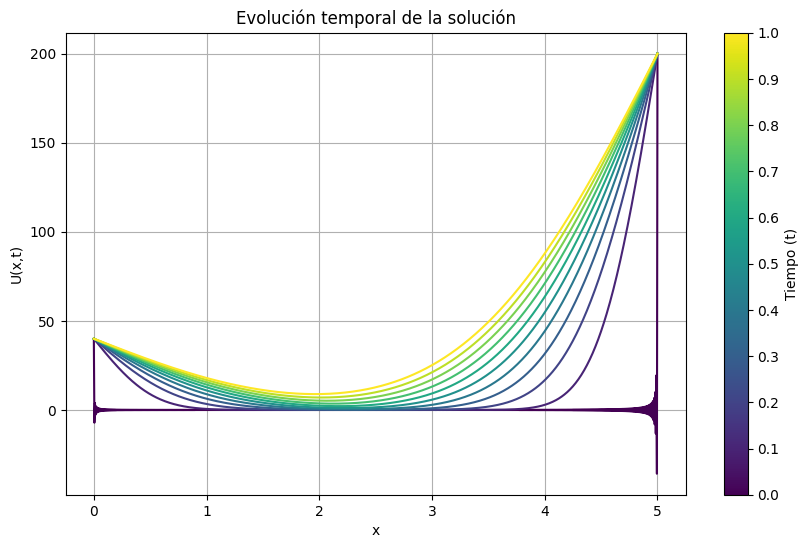

In [28]:
# ======================================
# 1. Gráfico de evolución temporal (2D)
# ======================================
t_values = np.linspace(0, 1, 11)
y_evolution = calcular_y(x, t_values, c, N_terminos)

fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=0, vmax=1)

# Crear todas las líneas primero
for i, t in enumerate(t_values):
    ax.plot(x, y_evolution[:, i],
            color=cmap(norm(t)),
            label=f't = {t:.1f}')

# Crear el mappable para la colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Necesario para evitar warnings

# Añadir colorbar usando el eje existente
cbar = fig.colorbar(sm, ax=ax, label='Tiempo (t)', ticks=t_values)
cbar.ax.set_yticklabels([f"{t:.1f}" for t in t_values])  # Formatear etiquetas

ax.set_title('Evolución temporal de la solución')
ax.set_xlabel('x')
ax.set_ylabel('U(x,t)')
ax.grid(True)
plt.show()

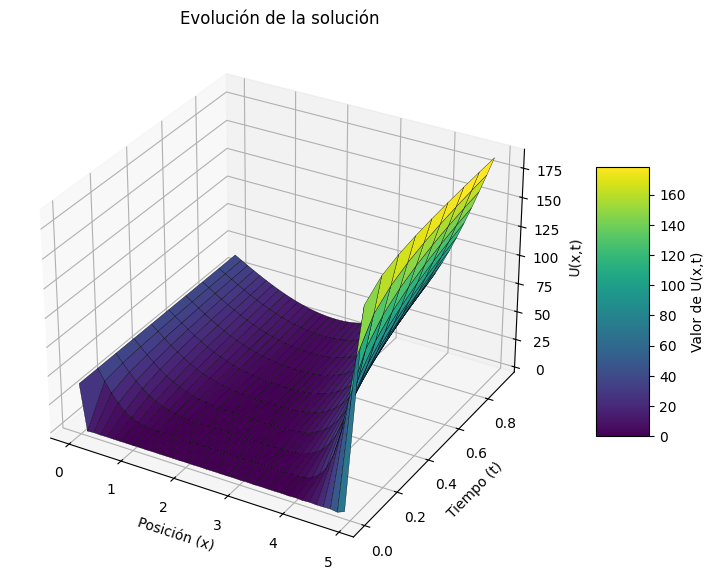

In [29]:
# =============================================
# 2. Gráfico 3D
# =============================================
# Usamos menos puntos para mejor rendimiento
x_3d = np.linspace(0, 5, 200)
t_3d = np.linspace(0, 1, 50)
X, T = np.meshgrid(x_3d, t_3d, indexing='ij')  # Mallas 2D
Y_3d = calcular_y(x_3d, t_3d, c, N_terminos)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Usamos solo cada 5to punto en x y t para mejor visualización
surface = ax.plot_surface(X[::5, ::5], T[::5, ::5], Y_3d[::5, ::5],
                         cmap='viridis',
                         edgecolor='k',
                         linewidth=0.25,
                         antialiased=True)

ax.set_xlabel('Posición (x)')
ax.set_ylabel('Tiempo (t)')
ax.set_zlabel('U(x,t)')
ax.set_title('Evolución de la solución')
fig.colorbar(surface, shrink=0.5, aspect=5, label='Valor de U(x,t)')

plt.show()

# **Solución numérica**

1) Discretización del dominio,

Dividimos el intervalo en N subintervalos con puntos en la malla $x_i=ih$ donde $i=0,1,...,N$ y $h=\frac{5}{N}$.

2) Condiciones iniciales y de frontera,

$$U_{i,0}=0,\hspace{0.5cm}\text{para}\hspace{0.5cm}i=1,...,N-1$$
$$U_{0,j}=40,\hspace{0.5cm}∀j$$
$$U_{N,j}=200, \hspace{0.5cm}∀j$$

3) Discretización de la EDP

$$U_{i,j+1}(1+2r)-r(U_{i+1,j+1}+U_{i-1,j+1})=U_{i,j}(1-2r)+r(U_{i+1,j}+U_{i-1,j})$$

con $r=\frac{c^2k}{2h^2}$

Sustituyendo los valores proporcionados por el problema obtenemos la siguiente representacion matricial,

$$
U_{i,j+1}\begin{bmatrix}
1.0835 & -0.04175 & 0 & 0\\
-0.04175 & 1.0835 & -0.04175 & 0\\
0 & -0.04175 & 1.0835 & -0.04175\\
0 & 0 & -0.04175 & 1.0835
\end{bmatrix}=U_{i,j}\begin{bmatrix}
0.9165 & 0.04175 & 0 & 0\\
0.04175 & 0.9165 & 0.04175 & 0\\
0 & 0.04175 & 0.9165 & 0.04175\\
0 & 0 & 0.04175 & 0.9165
\end{bmatrix}+\begin{bmatrix}
0.04175(U_{i-1,j}+U_{i-1,j+1})\\
0\\
0\\
0.04175(U_{i+1,j}+U_{i+1,j+1})
\end{bmatrix}
$$

In [30]:
def crank_nicolson(L, T, c, m, n, f_init, g0, gL):
    """
    Resuelve la ecuación de calor U_t = c^2 U_xx usando Crank-Nicolson
    en una barra [0,L] hasta tiempo T
    con condiciones de frontera g0(t), gL(t) y condición inicial f_init(x).

    Devuelve:
    - x: vector de posiciones
    - t: vector de tiempos
    - u_final: vector columna de la temperatura en t = T
    - u_full: evolución completa para graficar
    """
    dx = L / m
    dt = T / n
    s = (c / dx)**2 * (dt / 2)

    x = np.linspace(0, L, m+1)
    t = np.linspace(0, T, n+1)

    # Matriz de evolución
    u = np.zeros(m+1)
    u_full = np.zeros((m+1, n+1))

    # Condición inicial
    u[:] = f_init(x)
    u_full[:,0] = u.copy()

    # Condiciones de frontera
    frontera_izq = g0(t)
    frontera_der = gL(t)
    u[0] = frontera_izq[0]
    u[-1] = frontera_der[0]

    # Armar matrices del sistema
    A = np.zeros((m-1, m-1))
    B = np.zeros((m-1, m-1))

    # Matriz A para el paso de tiempo (implícita)
    for i in range(m-1):
        A[i,i] = 1 + s
        if i > 0:
            A[i,i-1] = -s/2
        if i < m-2:
            A[i,i+1] = -s/2

    # Matriz B para el tiempo anterior (explícita)
    for i in range(m-1):
        B[i,i] = 1 - s
        if i > 0:
            B[i,i-1] = s/2
        if i < m-2:
            B[i,i+1] = s/2

    # Método de avance temporal
    for ti in range(n):
        b = B @ u[1:-1]  # Solo nodos interiores
        # Corrección por condiciones de frontera
        b[0] += (s/2)*(u[0] + frontera_izq[ti+1])
        b[-1] += (s/2)*(u[-1] + frontera_der[ti+1])

        # Resolver sistema
        u_interior = np.linalg.solve(A, b)

        # Actualizar
        u[1:-1] = u_interior
        u[0] = frontera_izq[ti+1]
        u[-1] = frontera_der[ti+1]

        # Guardar en matriz completa
        u_full[:,ti+1] = u.copy()

    return x, t, u, u_full

In [31]:
# Ejemplo de uso:

# Parámetros
L = 5.0      # Longitud de la barra
T = 1        # Tiempo total
c = 0.835**(1/2)      # Coeficiente de difusión
m = 5        # Número de divisiones espaciales
n = 10      # Número de divisiones temporales

# Condiciones iniciales y de frontera
def f_init(x):
    return np.zeros_like(x)

def g0(t):
    return 40*np.ones_like(t)

def gL(t):
    return 200*np.ones_like(t)

# Ejecutar método
x, t, u_final, u_full = crank_nicolson(L, T, c, m, n, f_init, g0, gL)

In [32]:
# Mostrar vector columna solución final
np.set_printoptions(precision=5, suppress=True)
print(u_final.reshape(-1,1))  # Matriz columna

[[ 40.     ]
 [ 11.72772]
 [  3.4353 ]
 [ 10.71617]
 [ 57.99533]
 [200.     ]]


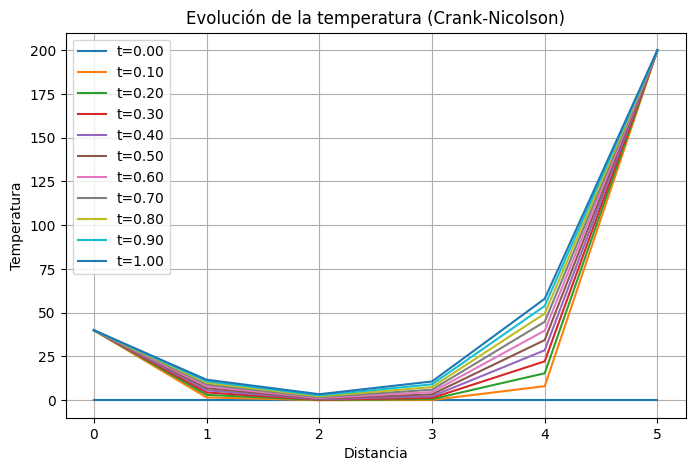

In [34]:
# Graficar evolución
fig = plt.figure(figsize=(8,5))
for i in range(0, n+1, n//10):
    plt.plot(x, u_full[:,i], label=f't={t[i]:.2f}')
plt.title('Evolución de la temperatura (Crank-Nicolson)')
plt.xlabel('Distancia')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
L = 5.0      # Longitud de la barra
T = 1        # Tiempo total
c = 0.835**(1/2)  # Coeficiente de difusión
m = 50       # Aumentamos m para mejor resolución espacial
n = 100      # Aumentamos n para mejor resolución temporal

# Condiciones iniciales y de frontera
def f_init(x):
    return np.zeros_like(x)

def g0(t):
    return 40*np.ones_like(t)

def gL(t):
    return 200*np.ones_like(t)

# Ejecutar método
x, t, u_final, u_full = crank_nicolson(L, T, c, m, n, f_init, g0, gL)

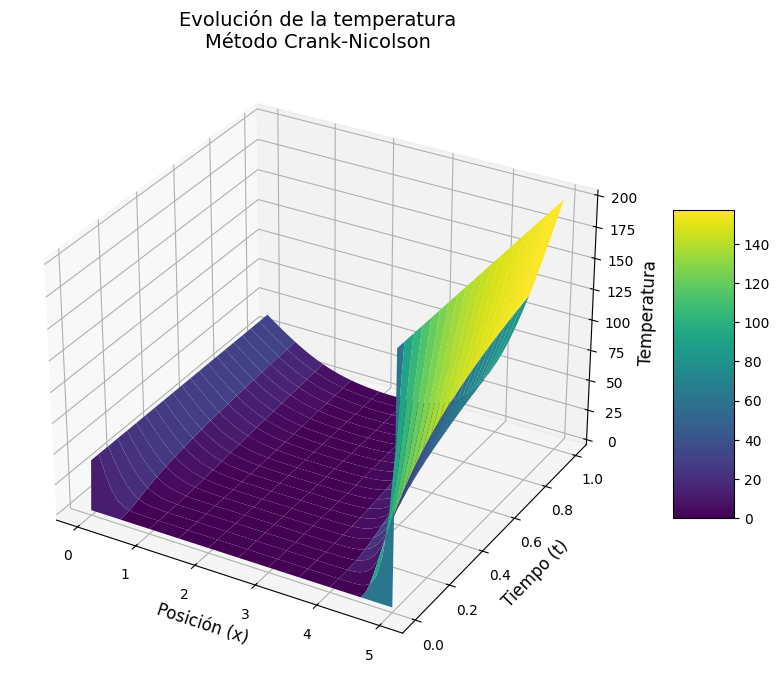

In [44]:
# Crear gráfico 3D
X, T_mesh = np.meshgrid(x, t)  # Malla para coordenadas 3D
Z = u_full.T                   # Transponer para dimensiones correctas

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar superficie
surf = ax.plot_surface(X, T_mesh, Z, cmap='viridis', rstride=5, cstride=5)

# Configuraciones del gráfico
ax.set_xlabel('Posición (x)', fontsize=12)
ax.set_ylabel('Tiempo (t)', fontsize=12)
ax.set_zlabel('Temperatura', fontsize=12)
ax.set_title('Evolución de la temperatura\nMétodo Crank-Nicolson', fontsize=14)

# Barra de colores
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()